In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

products_launch = pd.read_excel(r'C:\Users\YA223ZZ\OneDrive - EY\Desktop\Tiger\Product Launch Dataset.xlsm')
postioning_category = pd.read_excel(r'C:\Users\YA223ZZ\OneDrive - EY\Desktop\Tiger\Postioning Category Mapping.xlsm')
flavour_classification = pd.read_excel(r'C:\Users\YA223ZZ\OneDrive - EY\Desktop\Tiger\Flavour Classification Dataset.xlsm')

In [124]:
# in excel LEN(B2)-LEN(SUBSTITUTE(B2,";","")) : max flavours - 3
# in excel LEN(G2)-LEN(SUBSTITUTE(G2,";","")) : max positions - 21
products_launch[['Flavor_1', 'Flavor_2', 'Flavor_3']] = products_launch['Flavor'].str.split(';', 2, expand=True)

In [125]:
products_launch[['Flavor_1','Flavor_Sub1']] = products_launch['Flavor_1'].str.split(',',1, expand=True)
products_launch[['Flavor_2','Flavor_Sub2']] = products_launch['Flavor_2'].str.split(',',1, expand=True)
products_launch[['Flavor_3','Flavor_Sub3']] = products_launch['Flavor_3'].str.split(',',1, expand=True)

In [126]:
df_products = products_launch[['Product id','Market Subcategory','Launch Date','Country','Region','Positioning','Flavor_1','Flavor_Sub1','Flavor_2','Flavor_Sub2','Flavor_3','Flavor_Sub3']]

In [127]:
df_products.sort_values('Launch Date', ascending=True)
#df_products.tail()
#df_products.info()

,Product id,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor_1,Flavor_Sub1,Flavor_2,Flavor_Sub2,Flavor_3,Flavor_Sub3
0,1,Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural",Herbs,not specified,Fruit,not specified,None,None
6983,6984,Iced Tea,2001-01-01,WE14,West Europe,Convenience - Consumption,Lemon,None,Kiwi,None,Tea,green
6982,6983,Juice & Juice Drinks,2001-01-01,LA1,Latin America,Juice Drinks (up to 25% juice),Tea,green,Aloe Vera,None,None,None
6981,6982,Juice & Juice Drinks,2001-01-01,WE10,West Europe,100% Not from Concentrate,Pineapple,None,None,None,None,None
6980,6981,Carbonates,2001-01-01,A11,Asia,"Convenience - Consumption, Vitamin/Mineral For...",Fruit,not specified,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
102763,102764,Juice & Juice Drinks,2010-01-01,A11,Asia,"Low Calorie, Low Sugar, Ethical - Packaging, C...",Grape,Muscat,None,None,None,None
102762,102763,Sports Drinks RTD,2010-01-01,A11,Asia,"Sports & Recovery, Economy, Energy/Alertness, ...",Orange,Not Specified,None,None,None,None
69406,69407,Juice & Juice Drinks,2010-01-01,WE4,West Europe,"Natural, No Additives/Preservatives, Convenien...",Mango,None,None,None,None,None
102767,102768,Other Soft Drinks,2010-01-01,A11,Asia,"Low Calorie, Convenience - Consumption",Pineapple,None,Lime,None,None,None


In [128]:
df_products['Product id'].count()

114689

In [129]:
df_products['Market Subcategory'].value_counts()

Juice & Juice Drinks           49643
Drink Concentrates & Mixes     13994
Carbonates                     13578
Iced Tea                        9358
Bottled Water - Flavoured       6636
Energy Drinks                   6212
Bottled Water - Unflavoured     5296
Iced Coffee                     3890
Other Soft Drinks               3229
Sports Drinks RTD               2627
Sports Powders                   214
Sports Others                      6
Sports Supplements                 5
Other Soft Drinks                  1
Name: Market Subcategory, dtype: int64

In [130]:
df_products['Year'] = pd.DatetimeIndex(df_products['Launch Date']).year
df_products['Year'].value_counts().sort_index()

2001     8433
2002     7757
2003     7900
2004     8005
2005     9169
2006    11151
2007    13492
2008    14135
2009    17813
2010    16834
Name: Year, dtype: int64

In [131]:
df_products['Region'].value_counts()

West Europe      33218
Asia             27775
North America    20085
East Europe      11467
Latin America     9348
Middle East       5636
Africa            4790
Australasia       2370
Name: Region, dtype: int64

In [132]:
df_products['Month'] = pd.DatetimeIndex(df_products['Launch Date']).month
df_products['Month'].value_counts().sort_index()

1    114689
Name: Month, dtype: int64

In [133]:
# Region = "North America"
df_NA = df_products[df_products['Region'] == 'North America']
df_NA['Product id'].count()

20085

Juice & Juice Drinks           6816
Drink Concentrates & Mixes     3229
Iced Tea                       2145
Carbonates                     2024
Energy Drinks                  1937
Bottled Water - Flavoured      1833
Sports Drinks RTD               612
Bottled Water - Unflavoured     534
Iced Coffee                     488
Other Soft Drinks               380
Sports Powders                   81
Sports Others                     4
Sports Supplements                2
Name: Market Subcategory, dtype: int64

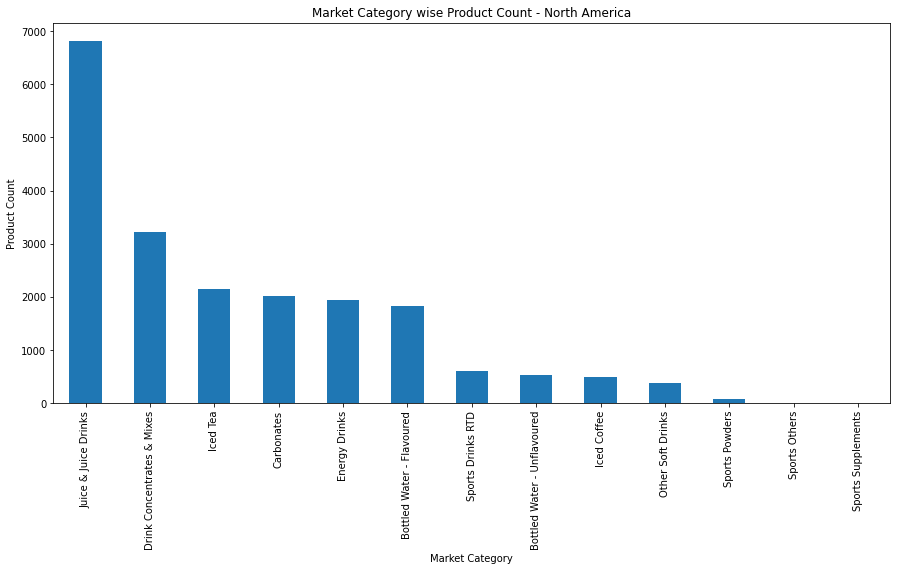

In [134]:
df_NA['Market Subcategory'].value_counts().plot(kind="bar",figsize=(15,7),title='Market Category wise Product Count - North America')
plt.xlabel('Market Category')
plt.ylabel('Product Count')
df_NA['Market Subcategory'].value_counts()

Text(0, 0.5, 'Product Count')

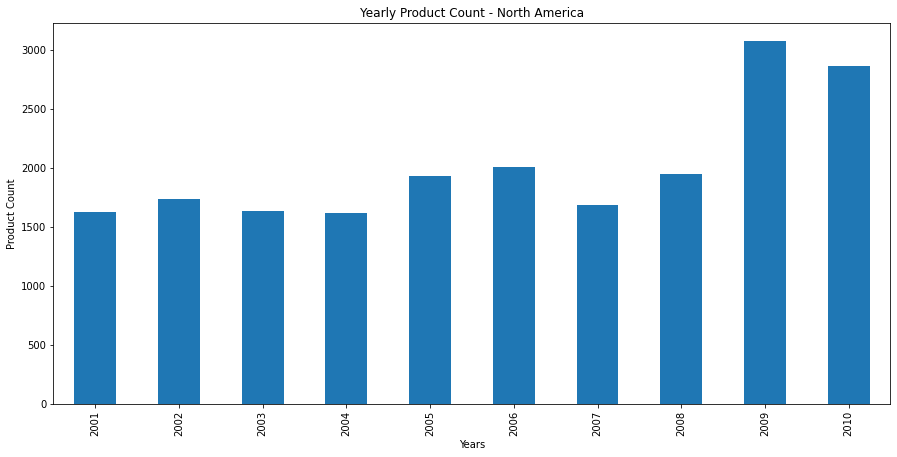

In [135]:
df_NA['Year'].value_counts().sort_index().plot(kind="bar",figsize=(15,7),title='Yearly Product Count - North America')
plt.xlabel('Years')
plt.ylabel('Product Count')

<AxesSubplot:title={'center':'Market Category development Y-O-Y'}, xlabel='Year'>

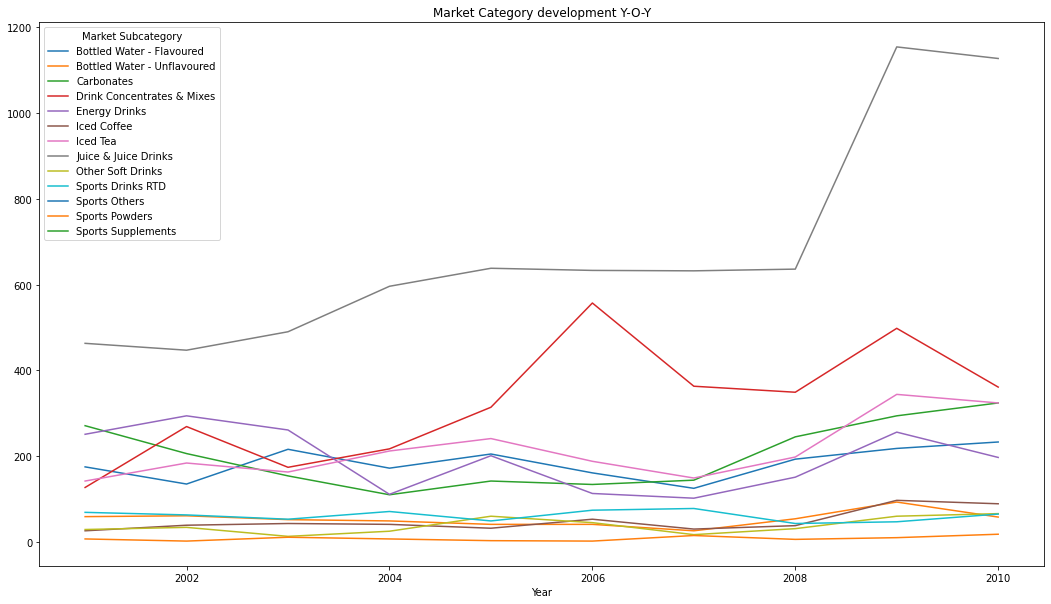

In [136]:
df_NA.groupby(['Year','Market Subcategory'])['Product id'].count().unstack().reset_index().plot(figsize=(18,10),x='Year',title='Market Category development Y-O-Y')

In [137]:
df_market_category = df_NA.groupby(['Year','Market Subcategory'], as_index=False).agg({"Product id": "count"})
#df_market_category.to_excel('Market_Category.xlsx')

In [138]:
df_flavor = products_launch[['Product id','Flavor','Market Subcategory','Launch Date','Country','Region','Positioning','Flavor_1','Flavor_2','Flavor_3']]
df_NA_flavor = df_flavor[df_flavor['Region'] == 'North America']
df_NA_flavor.reset_index(drop=True,inplace=True)
df_NA_flavor.head()

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor_1,Flavor_2,Flavor_3
0,7,"Fruit, not specified",Drink Concentrates & Mixes,2001-01-01,NA1,North America,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",Fruit,None,None
1,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,2001-01-01,NA1,North America,Convenience - Packaging,Cherry,Vanilla,None
2,10,"Orange, not specified",Juice & Juice Drinks,2001-01-01,NA1,North America,"Low Calorie, Low Sugar",Orange,None,None
3,11,"Superfruit, Pomegranate; Berry, Blackberry",Carbonates,2001-01-01,NA1,North America,"Female, Antioxidant, Low Calorie, Low Carb, Su...",Superfruit,Berry,None
4,15,"Superfruit, acai; Herbs, not specified",Juice & Juice Drinks,2001-01-01,NA2,North America,"Heart Health, Antioxidant, Anti-Aging/Aging-We...",Superfruit,Herbs,None


In [139]:
df_NA_flavor['Year'] = pd.DatetimeIndex(df_NA_flavor['Launch Date']).year
df_NA_flavor.head()

<ipython-input-139-43a204319bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA_flavor['Year'] = pd.DatetimeIndex(df_NA_flavor['Launch Date']).year


,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor_1,Flavor_2,Flavor_3,Year
0,7,"Fruit, not specified",Drink Concentrates & Mixes,2001-01-01,NA1,North America,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",Fruit,None,None,2001
1,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,2001-01-01,NA1,North America,Convenience - Packaging,Cherry,Vanilla,None,2001
2,10,"Orange, not specified",Juice & Juice Drinks,2001-01-01,NA1,North America,"Low Calorie, Low Sugar",Orange,None,None,2001
3,11,"Superfruit, Pomegranate; Berry, Blackberry",Carbonates,2001-01-01,NA1,North America,"Female, Antioxidant, Low Calorie, Low Carb, Su...",Superfruit,Berry,None,2001
4,15,"Superfruit, acai; Herbs, not specified",Juice & Juice Drinks,2001-01-01,NA2,North America,"Heart Health, Antioxidant, Anti-Aging/Aging-We...",Superfruit,Herbs,None,2001


In [140]:
df_2 = df_NA_flavor.melt(id_vars=["Product id",'Flavor','Market Subcategory','Launch Date','Country','Region','Positioning','Year'], var_name="Flavor_Hier", value_name="Cust_flavor")
df_NA_final = df_2.sort_values(by=['Product id'])
df_NA_final.head()

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Year,Flavor_Hier,Cust_flavor
0,7,"Fruit, not specified",Drink Concentrates & Mixes,2001-01-01,NA1,North America,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",2001,Flavor_1,Fruit
20085,7,"Fruit, not specified",Drink Concentrates & Mixes,2001-01-01,NA1,North America,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",2001,Flavor_2,None
40170,7,"Fruit, not specified",Drink Concentrates & Mixes,2001-01-01,NA1,North America,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",2001,Flavor_3,None
1,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,2001-01-01,NA1,North America,Convenience - Packaging,2001,Flavor_1,Cherry
20086,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,2001-01-01,NA1,North America,Convenience - Packaging,2001,Flavor_2,Vanilla


In [141]:
df_NA_final.info()
df_NA_final_withoutNA = df_NA_final.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60255 entries, 0 to 60254
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product id          60255 non-null  int64         
 1   Flavor              58986 non-null  object        
 2   Market Subcategory  60255 non-null  object        
 3   Launch Date         60255 non-null  datetime64[ns]
 4   Country             60255 non-null  object        
 5   Region              60255 non-null  object        
 6   Positioning         58602 non-null  object        
 7   Year                60255 non-null  int64         
 8   Flavor_Hier         60255 non-null  object        
 9   Cust_flavor         31491 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 5.1+ MB


In [142]:
df_NA_final_withoutNA.info()
df_NA_final_withoutNA['Product id'].count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30720 entries, 0 to 20084
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product id          30720 non-null  int64         
 1   Flavor              30720 non-null  object        
 2   Market Subcategory  30720 non-null  object        
 3   Launch Date         30720 non-null  datetime64[ns]
 4   Country             30720 non-null  object        
 5   Region              30720 non-null  object        
 6   Positioning         30720 non-null  object        
 7   Year                30720 non-null  int64         
 8   Flavor_Hier         30720 non-null  object        
 9   Cust_flavor         30720 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 2.6+ MB


30720

In [143]:
df_NA_final_withoutNA['Cust_flavor'] = df_NA_final_withoutNA['Cust_flavor'].str.strip()
df_NA_final_withoutNA.reset_index(drop=True,inplace=True)

<ipython-input-143-60ff0c3f5e9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA_final_withoutNA['Cust_flavor'] = df_NA_final_withoutNA['Cust_flavor'].str.strip()


In [144]:
df_NA_final = pd.merge(df_NA_final_withoutNA,flavour_classification,left_on='Cust_flavor', right_on='Flavor',how='inner')
df_final = df_NA_final.sort_values(by=['Product id']).reset_index(drop=True)
df_final.count()

Product id            13137
Flavor_x              13137
Market Subcategory    13137
Launch Date           13137
Country               13137
Region                13137
Positioning           13137
Year                  13137
Flavor_Hier           13137
Cust_flavor           13137
Flavor_Group          13137
Flavor_y              13137
Unnamed: 2                0
Unnamed: 3                0
Unnamed: 4                0
Unnamed: 5                0
Unnamed: 6                0
dtype: int64

In [145]:
df_final['Product id'].nunique()

10338

In [146]:
df_final.groupby(['Flavor_Group'])['Product id'].count()

Flavor_Group
Alcohol                  45
Brown Flavors          1247
Cake, cookie & pie       23
Dairy Flavors            31
Ethnic                   72
Fantasy Flavors          39
Flowers                 208
Fruit                  8921
Grains                    9
Herbs                   200
Mint & Menthol          113
Poultry, meat, fish       9
Sauce & Condiment         3
Smoke & Roasted          24
Spices & Seeds          628
Unflavored             1011
Vegetable               554
Name: Product id, dtype: int64

In [147]:
df_top_flavors = df_final.groupby(['Year','Flavor_Group'], as_index=False).agg({"Product id": "count"})
#df_top_flavors.to_excel('Flavors.xlsx')    

<AxesSubplot:title={'center':'Flavors development Y-O-Y'}, xlabel='Year'>

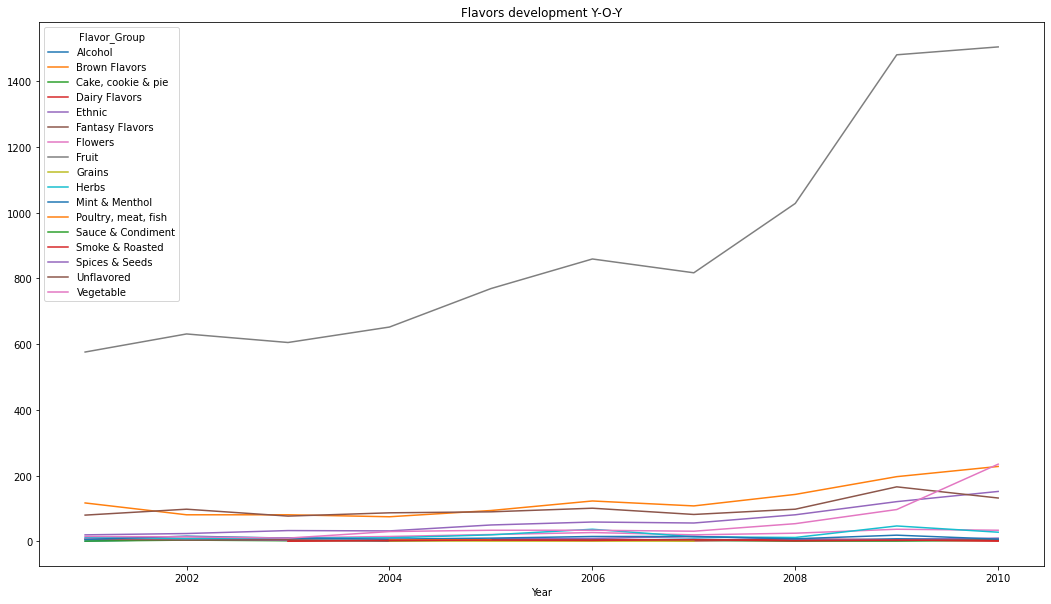

In [148]:
df_final.groupby(['Year','Flavor_Group'])['Product id'].count().unstack().reset_index().plot(figsize=(18,10),x='Year',title='Flavors development Y-O-Y',legend=True)

In [149]:
s = df_final.groupby(['Year','Flavor_Group'], as_index=False).agg({"Product id": "count"})
s.rename(columns={'Product id': 'Count'},inplace=True)
flavor_dev = s.pivot(index='Year',columns='Flavor_Group',values=['Count'])
flavor_dev

Count                                                        \
Flavor_Group Alcohol Brown Flavors Cake, cookie & pie Dairy Flavors Ethnic   
Year                                                                         
2001             1.0         117.0                1.0           NaN    7.0   
2002             6.0          81.0                4.0           NaN    8.0   
2003             4.0          81.0                2.0           1.0    3.0   
2004             2.0          75.0                3.0           4.0    NaN   
2005             5.0          94.0                NaN           4.0    8.0   
2006             3.0         123.0                5.0           7.0    9.0   
2007             7.0         108.0                3.0           2.0   15.0   
2008             2.0         143.0                1.0           7.0    7.0   
2009             8.0         197.0                1.0           5.0    5.0   
2010             7.0         228.0                3.0           1.0   10.0   

                                                                          \
Flavor_Group Fantasy Flavors Flowers   Fruit Grains Herbs Mint & Menthol   
Year                                                                       
2001                     7.0     9.0   576.0    1.0  12.0            6.0   
2002                     4.0     9.0   631.0    NaN   9.0           16.0   
2003                     5.0    11.0   605.0    NaN  10.0           10.0   
2004                     1.0    15.0   652.0    2.0  11.0            7.0   
2005                     4.0    21.0   769.0    1.0  20.0           10.0   
2006                     4.0    27.0   859.0    1.0  37.0           15.0   
2007                     3.0    20.0   817.0    1.0  14.0           15.0   
2008                     3.0    25.0  1028.0    NaN  12.0            8.0   
2009                     3.0    37.0  1480.0    NaN  47.0           19.0   
2010                     5.0    34.0  1504.0    3.0  28.0            7.0   

                                                                    \
Flavor_Group Poultry, meat, fish Sauce & Condiment Smoke & Roasted   
Year                                                                 
2001                         NaN               NaN             NaN   
2002                         NaN               NaN             NaN   
2003                         NaN               1.0             1.0   
2004                         4.0               NaN             3.0   
2005                         5.0               1.0             4.0   
2006                         NaN               NaN             3.0   
2007                         NaN               NaN             5.0   
2008                         NaN               1.0             2.0   
2009                         NaN               NaN             4.0   
2010                         NaN               NaN             2.0   

                                                  
Flavor_Group Spices & Seeds Unflavored Vegetable  
Year                                              
2001                   20.0       80.0      15.0  
2002                   24.0       98.0      14.0  
2003                   33.0       77.0      10.0  
2004                   32.0       87.0      30.0  
2005                   50.0       90.0      34.0  
2006                   59.0      101.0      34.0  
2007                   56.0       82.0      31.0  
2008                   81.0       98.0      54.0  
2009                  121.0      166.0      97.0  
2010                  152.0      132.0     235.0

In [150]:
flavor_growth = pd.DataFrame(flavor_dev.to_records())
flavor_growth_YoY = flavor_growth.pct_change()*100
x=2001
for i in flavor_growth_YoY['Year'].index:
    flavor_growth_YoY['Year'][i]=x+i
flavor_growth_YoY['Year'] = flavor_growth_YoY['Year'].astype(int).astype(str)

<AxesSubplot:title={'center':'Market Category development Y-O-Y'}, xlabel='Year'>

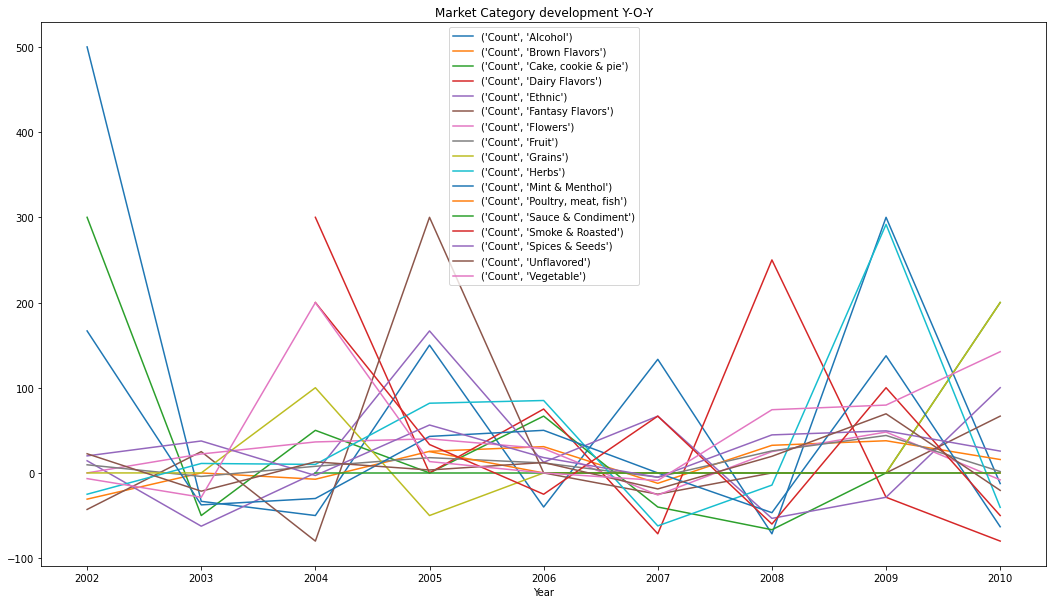

In [151]:
#flavor_growth_YoY.to_excel('Flavor_YoY.xlsx')
flavor_growth_YoY.plot(figsize=(18,10),x='Year',title='Market Category development Y-O-Y')

# New Products - Drill down on below hierachy
     -> Market Category      - % growth Increase in Products
     -> Flavor               - % growth Increase in Products
     -> Postioning           - % growth Increase in Products
     -> General Marekt R&D   - (What is liked in NA) 

In [152]:
# Market Category
df_NA.groupby(['Year','Market Subcategory'], as_index=False).agg({"Product id": "count"})

,Year,Market Subcategory,Product id
0,2001,Bottled Water - Flavoured,175
1,2001,Bottled Water - Unflavoured,59
2,2001,Carbonates,271
3,2001,Drink Concentrates & Mixes,127
4,2001,Energy Drinks,251
...,...,...,...
107,2010,Juice & Juice Drinks,1127
108,2010,Other Soft Drinks,66
109,2010,Sports Drinks RTD,65
110,2010,Sports Powders,18


In [252]:
df_final[df_final['Flavor_Group']=='Fruit'].groupby(['Cust_flavor'])['Product id'].count().nlargest(5)

Cust_flavor
Lemon         1038
Mango          991
Strawberry     969
Lemonade       817
Peach          735
Name: Product id, dtype: int64

In [251]:
df_final[df_final['Flavor_Group']=='Vegetable'].groupby(['Cust_flavor'])['Product id'].count().nlargest(5)

Cust_flavor
Carrot      190
Cucumber    100
Kale         62
Celery       49
Beetroot     47
Name: Product id, dtype: int64

In [253]:
df_final[df_final['Flavor_Group']=='Brown Flavors'].groupby(['Cust_flavor'])['Product id'].count().nlargest(5)

Cust_flavor
Cola          442
Honey         241
Root Beer     133
Ginger Ale    131
Caramel        76
Name: Product id, dtype: int64

<AxesSubplot:title={'center':'Flavors development (Iced Tea) Y-O-Y'}, xlabel='Year'>

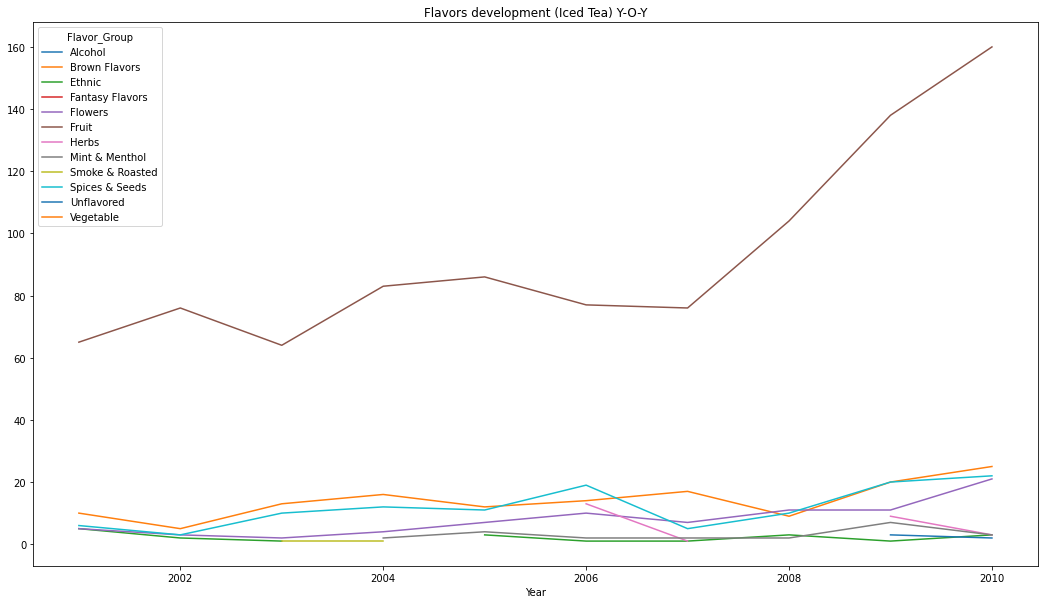

In [266]:
df_tea = df_final[df_final['Market Subcategory'] == 'Iced Tea']
df_tea.groupby(['Year','Flavor_Group'])['Product id'].count().unstack().reset_index().plot(figsize=(18,10),x='Year',title='Flavors development (Iced Tea) Y-O-Y',legend=True)

<AxesSubplot:title={'center':'Categorical Count - Iced Tea'}>

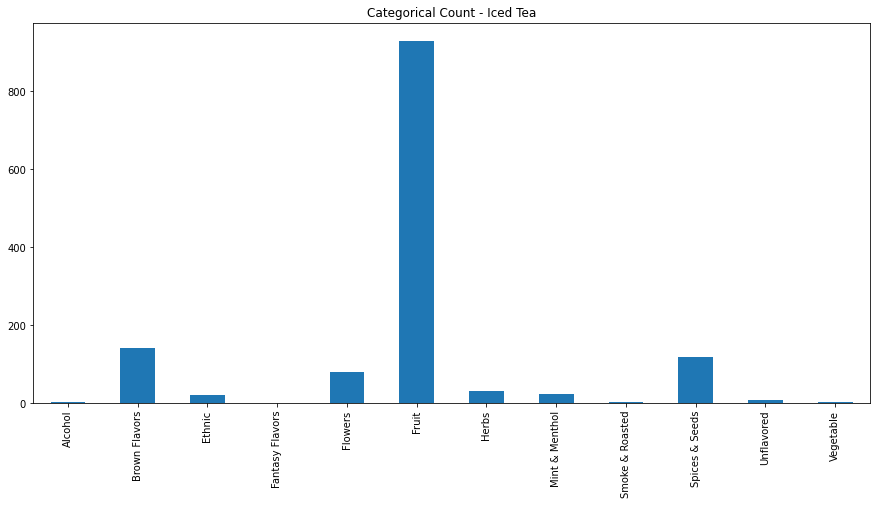

In [260]:
df_tea['Flavor_Group'].value_counts().sort_index().plot(kind="bar",figsize=(15,7),title='Categorical Count - Iced Tea')

https://www.restaurantbusinessonline.com/beverage/focusing-flavor-iced-tea-trends-insights

-> sweet,lemon,raspberry

https://www.bevindustry.com/articles/92246-2019-state-of-the-beverage-industry-ready-to-drink-tea-functionality-drives-demand-in-market

Revnue, market share

https://www.dairyfoods.com/articles/94828-on-trend-rtd-beverages-keep-em-thirsting-for-more

https://www.transparencymarketresearch.com/iced-tea-market.html

https://www.mordorintelligence.com/industry-reports/north-america-ready-to-drink-tea-market

growth, trend

https://www.teaandcoffee.net/blog/21766/cannabis-cbd-infused-beverages-remain-on-the-rise/

<AxesSubplot:title={'center':'Fruit Flavor - Iced Tea'}, xlabel='Cust_flavor'>

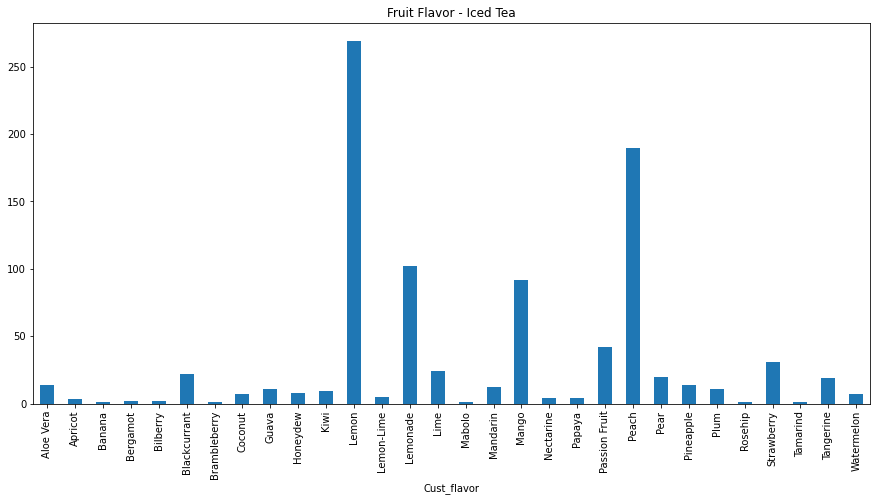

In [262]:
df_tea[df_tea['Flavor_Group']=='Fruit'].groupby(['Cust_flavor'])['Product id'].count().sort_index().plot(kind="bar",figsize=(15,7),title='Fruit Flavor - Iced Tea')

<AxesSubplot:title={'center':'Brown Flavours - Iced Tea'}, ylabel='Cust_flavor'>

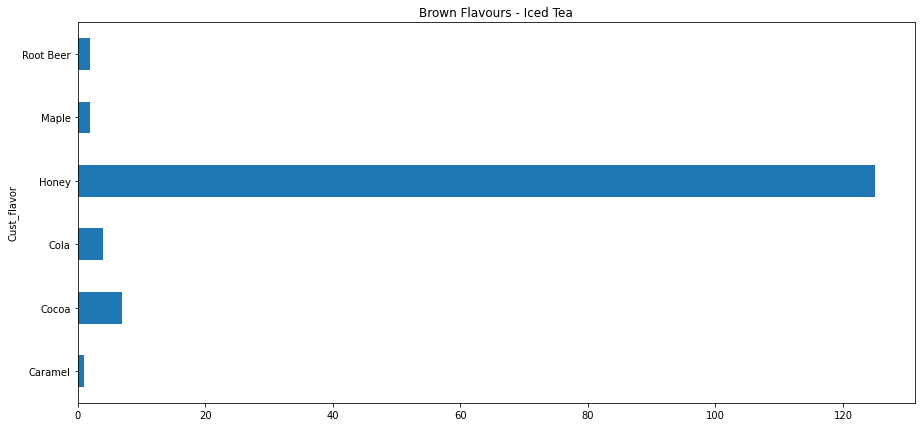

In [265]:
df_tea[df_tea['Flavor_Group']=='Brown Flavors'].groupby(['Cust_flavor'])['Product id'].count().sort_index().plot(kind="barh",figsize=(15,7),title='Brown Flavours - Iced Tea')